## 09/20 Book - mathematics for machine learning, page 120-137, SVD

### Eigen Decomposition

We are given a matrix A that is a linear transformation of some sort, then A is diagonalizable if it is similar to diagonal matrix D, meaning:

$ A=SDS^{-1} $

This means that **D** is a linear transformation that is the same as **A** but with respect to a different basis, namely **S**.
The motivation of doing this is that matrix **D** is easier to work with.

There are certain requirements that have to be met before being able to decompose a matrix $ A \in R^{nxn} $ into $ SDS^{-1} $ form. The general idea is that if we have **span of all eigen vectors = n** of **A** then we can describe linear transformation **A** as a scaling of eigenvectors that will form a different basis.  
So that $ S^{-1} $ is the transformation from the default basis to eigen basis  
**D** is a stretching of this space in the direction of basis(eigenvectors)  
**S** is transformation back to our default basis so that it is with respect to $ \hat{\mathbf{i}}\ and\ \hat{\mathbf{j}} $

$$
A = SDS^{-1} \\
S^{-1}A = DS^{-1} \\
Transformation\ A\ in\ terms\ of\ eigenvectors\ equals\ stretching\ to\ of\ those\ eigenvectors. \\
AS=SD \\
$$

$$
\begin{vmatrix}
a & b\\
c & j
\end{vmatrix} 
\begin{vmatrix}
\vec{e_1}&\vec{e_2}\\
\end{vmatrix} 
=
\begin{vmatrix}
\vec{e_1}&\vec{e_2}\\
\end{vmatrix}
\begin{vmatrix}
\lambda_1 & 0\\
0 & \lambda_2
\end{vmatrix} 
$$

$$
Ae_1=\lambda_1e_1 \\
Ae_2=\lambda_2e_2
$$
                                        

                                        Therefore e's has to be eigenvectors.
                    So applying A in terms of eigenbasis equals to scaling those eigenvectors. 

Diagonal Matricies can be efficiently raised to power
$$
A^k = (SDS^{-1})^k \\
A^k = SD^kS^{-1}
$$
Since we have to change the bases only once and then apply the similar transformation many times so that change of basis matricies doesn't have to be squared.



### SVD

The problem with eigen value decomposition is that it can be applied only to the matricies with eigenvectors i.e. only to square matricies. This shortcoming is circumvented by the aplication of a new decomposition called **Singular Value Decomposition** or **SVD** for short.  
$ A = U\Sigma V^T$

Where 
U and V matricies are rotations, and Sigma is stretching.  
First we basically rotate our input in Rn space to the basis of Rn then stretch to a Rm space and then rotate it in Rm space.
It is important to note that those rotations Matricies are also basis change matricies and rotate hyperplane to fit a new basis in higher or lower dimensional space.

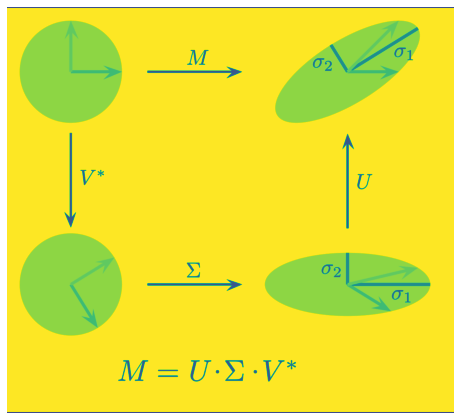

In [42]:
from matplotlib.image import imread
import matplotlib.pyplot
import numpy as np
import os

#set scale
matplotlib.pyplot.rcParams['figure.figsize'] = [8,8]

#raed an image in ./ folder to the matrix A
A = imread('eigen.png')

#change the matrix that represents the picture
X = np.mean(A, -1);

#create an image object
img = plt.imshow(X)
#change its coding to gray
#img.set_cmap('gray')
#turn of plot axis
plt.axis('off')

#turn off Out[32]??
plt.show()



All diagonal entries in Sigma matrix decrease in value and only the first few are import in terms of extracting features from the original big matrix. If M is moviesXperson datatable then U is representing an eigenperson or person-concept vector and V represents movie-to-concept vector. How each movie is related to a particular (found) concept f.e. sci-fi and how a person is related to the same concept. And the importance of any such concept is represented by the ith value of the Sigma matrix. Last few concept usually represent error/noise correction and thus have very litla sigma values. 

$$
A=U\Sigma V^T \\
AA^T=U\Sigma V^T(U\Sigma V^T)^T\\
AA^T=U\Sigma V^TV\Sigma^TU^T \\
AA^T=U\Sigma \Sigma^TU^T\\
AA^T=U\Sigma^2U^T
$$

In this case we see that **U** looks like an eigenbasis of the Matrix **AAT** and its eigenvalues equalt to $\sigma^2$  
By following similar operations we can also see that:  

$$ A^TA=V\Sigma^2 V^T$$

So **V** is a eigenbasis of ATA and $\sigma^2$ is also an eigenvalues.

If $S=S^T \to S=PDP^T$ because S is symmetric its Matrix of eigenvectors can be represented as ONB(orthnormal basis) in this case $P^{-1}=P^T \gets PP^T=Id$. 

SVD is directly related to dimensionality reduction, tailored to your data (matrix)  
https://www.youtube.com/watch?v=nbBvuuNVfco&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=2 Content:  
If we have a Matrix **X** columns of which are faces (set of pixel values) then it can be SVD'd into   
$U\Sigma V^T$  
Columns of U are eigenfaces, a vector of pixels that represent a set of "most common?" features that is streatched or squished by Sigma or Vt to form an input x1(or the first face/ first column of **X**).    
Where Sigma values $\sigma_{i,i}$ say how important each column (eigen something) is.  
And $V^T$ is a how to combine those eigenfaces to get a face number 1 or x_1.


Given a matrix **X** of facers in the columns like we ahd earlier then $X^TX$ is a square matrix where every entry is the inner product of two original columns/faces. Therefore if XTX_i,j is big then face i and face j are very similar and on the contrary if **XTX_i,j** is small then faces are orthogonal or very different.

How would I compute an SVD of a matrix A e nxm  
Notice that:  
$$
AA^T=US^2U^T \\
A^TA=VS^2V^T
$$


So we can compute AAT and ATA and then what we have to do is to just find their eigenvectors and eigenvalues. The former are different and correspond to the columns of U and rows of Vt respectively. And the latter are the same, we just take the square root and we are done.
AAT and ATA are correlation matricies. Where the first one is the inner product of each row as an element of a matrix (symmetric). And the second one is the inner product of each column distributed accross the matrix in the same symmetric way.

In [37]:
hel="hello"

In [44]:
print(2)
np.matrix("1 1;2 2")
np.matrix("1 1;2 2")
np.matrix("12 1;2 2")

#outputs only the last expression evalueted
#and it is the whole file every cell remembers previous variables

2


matrix([[12,  1],
        [ 2,  2]])

In [ ]:
#Singular Value decomposition in python
U, S, V = np.linalg.svd(X, full_matrices=False) #false means that I want to do the economy version of the SVD
#U Sigma V transpose

#S is a vector MS a diagonal matrix
MS = np.diag(S)

    

In [81]:
#cheking the sizes of the correspondign matrices
r = 5
print(
U[:, :r].shape,
MS[:r, :r].shape,
V[:r, :].shape)
    

(1091, 5) (5, 5) (5, 1200)


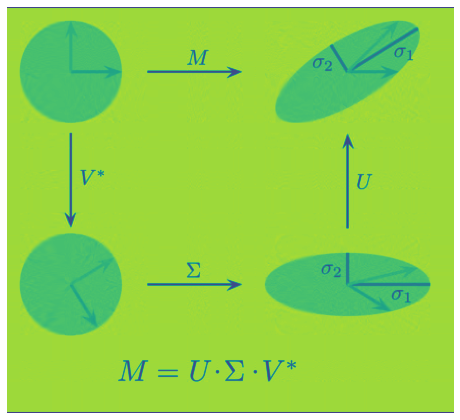

In [129]:
#approximating the original matrix with the help of U S and V

r = 100

Xapp=U[:, :r] @ MS[:r, :r] @ V[:r, :]
#create an image object
img = plt.imshow(Xapp)
#change its coding to gray
#img.set_cmap('gray')
#turn of plot axis
plt.axis('off')
#turn off Out[32]??
plt.show()

Plotting singular values ($\sigma$) is very important to understand how compressable is the date and how much energy (information is) is caputred by the first r vectors.

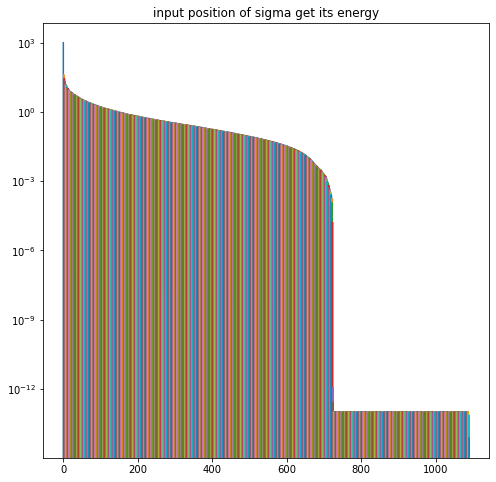

In [117]:
import matplotlib.pyplot as plt

matplotlib.pyplot.figure(1)
matplotlib.pyplot.semilogy(np.diag(S))
matplotlib.pyplot.title('input position of sigma get its energy')
plt.show()

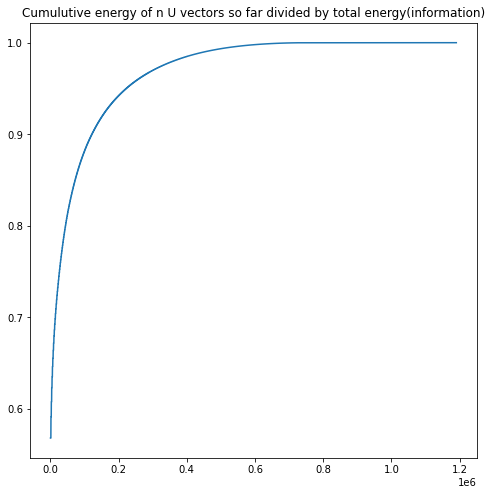

200000.0

In [125]:
#what this does??
matplotlib.pyplot.figure(2)
matplotlib.pyplot.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
matplotlib.pyplot.title("Cumulutive energy of n U vectors so far divided by total energy(information)")
matplotlib.pyplot.show()
0.2*1e6

Given a linear system of equation with non square matrix A we can have two general cases overdetermined/underdetermined.  
Over when small big input vector x say from R4 is mapped to R2 plane and thus usually there are many vectors from R4 that are squished onto R4 what make it has infinitely many solutions. In this case we also use SVD and what we get is infinitely mane solutions for example a line that is mapped to a point so what we do is find a minimum two norm (length) of this line that mapps to a desired point. (By convention) Also can be interpreted as the cheapest way to transform x to desired output. I think this vector is probably pointing to this exact point of (our intereset/output) with respect to the different basis in R3.


Whereas we have underdetermined when x e R2 is mapped to R4 and we want usually our desired vector (output) has no input that is moved to him. So what we do is pseudo inverse of A that is calculated by SVD and what it gives is we want to find x that projection after transofmation of which is closest (in terms of a two norm) to the desired output. So basically we are minimazing the error, Also called least squares solution (probably because least distances).

Linear system: Ax=b  
Rows of A are people's information on their daily habits injuries, comorbidities...
So columns are all off these medical parameters  
x is unknown  
vector b is a known risk of heart disease for every person  
Our goal is to find such x that combines all of those medical info so that we get a reliable estimation of a person's (with those parameters) heart disease chance  
However if we try to overfit or make every answer exact in this model so that it works ideally for Ax=b then it will probably have lots of noise since our sample probably is not large enough. So we want to find something that is generalizable to other people's sets of medical parameters such that when we figure x we can multiply it by some new person and get his chance of heart failure even though we didn't know it before hand.

Spectral norm :=
$ ||A|| = \max(\frac{||Ax||}{||x||}) $
The biggest radius of a stretched circle.  
Also the first/biggest singular value corresponds to the spectral norm since first SVD tranform/rotation is still in the initial Rm space and then we stretch but dimensions of the "figure" is the same -> so that was the biggest stretch a vector can get since sigma_1 is the biggest stretching.

The rank k SVD matrix that is produced by the summation of k biggest outer products  
$$
\Sigma_{i=1}^{k}{u_i\sigma_iv_i^T}
$$
is the best possible (SVD) approximation of the original matrix with the rank K. Also known as Eckart-Young Theorem  

Spectral norm of (the original matrix - rank K matrix) is $\sigma_{k+1}$ because the biggest singular value of a a matrix is its spectral norm.


SVD:  

$$
[ u_1 u_2 u_3 ]*\vec{\sigma}Id*V^T
$$
where V^t is basically:  
$$
[v_1^T]\\
[v_2^T]\\
[v_3^T]
$$
So first sigma scales the first row vector of V namely V1^T and the first column vector u_1  
It means that concept related to sigma_1 is store in first row of V and first column of U  
Therefore the first column of U is this stereotypical column(f.e. face, or person) (that is related to this concept) and it is the most prominent and the first row of the V matrix is the stereotipical row (mixture of faces, movie) related to **the same** concept. 

Cholseky decomposition is **A = L_l L_u** lower upper triangular decomposition.  
It is positive def -> symmetric -> normal -> non-defective )diagonazible0 -> square -> real matrix

**Tensor is a 2D+ matrices.**